"" @author:nikhil ""

# Task#5:-To Explore Business Analytics

## Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’

You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? You can choose any of the tool of your choice

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/home/nikhil/Desktop/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df['Ship Mode'].nunique()

4

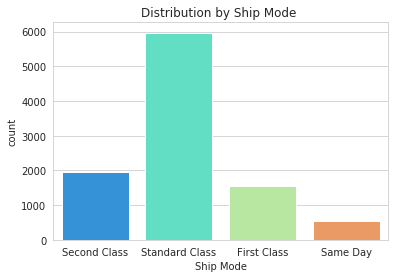

In [7]:
# Let's try to visualize the 'Ship Mode' column from the dataset.
sns.set_style('whitegrid')
sns.countplot(x='Ship Mode',data=df,palette='rainbow')
plt.title('Distribution by Ship Mode ')
plt.show()

Ship Mode is categorical feature with 4 levels -- Second Class,Standard Class,First Class,Same Day.The distribution is higest in standard class followed by second ,first and same day.

In [8]:
#let's find levels in Segment categorical Variable
df['Segment'].nunique()

3

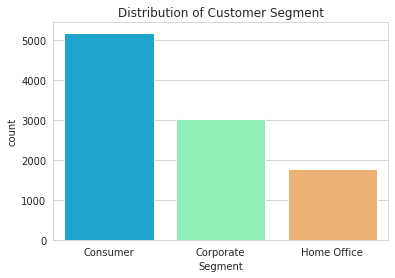

In [9]:
# What is the distribution of our coustomer segment?
#Let's try to visualize the 'Segment' column from dataset
sns.set_style('whitegrid')
sns.countplot(x='Segment',data=df,palette='rainbow')
plt.title("Distribution of Customer Segment")
plt.show()


from above graph ,we can easily seen that  segment attribute has 3 levels-->>consumer,corporate,home office.Distribution is higest in Consumer followed by corporate and Home office. 

Text(0, 0.5, 'Profit')

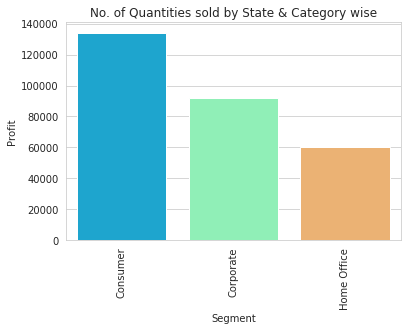

In [10]:

sale_Products = df.groupby(["Segment"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False)
sns.barplot(x = "Segment", y= "Profit" ,data=sale_Products,palette='rainbow')
plt.title('No. of Quantities sold by State & Category wise')
plt.xlabel('Segment')
plt.xticks(rotation=90)
plt.ylabel('Profit')

# Profit by Segment and Sub-Category wise

Text(0, 0.5, 'Profit')

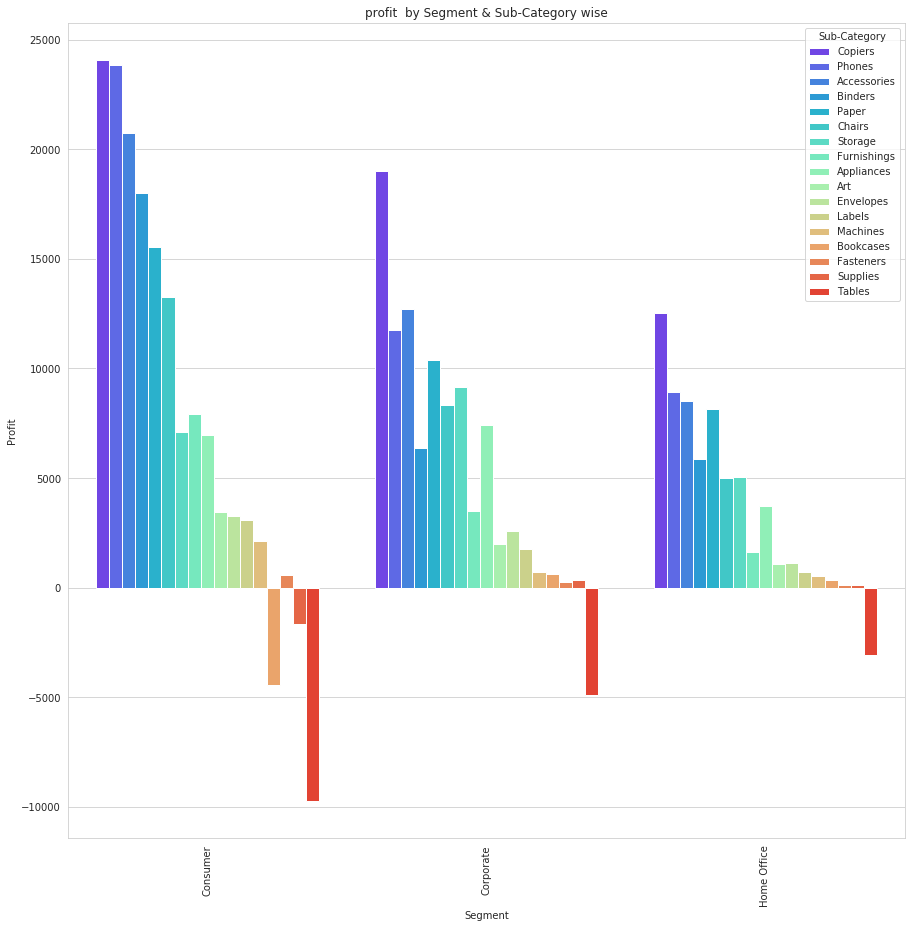

In [11]:
fig=plt.figure(figsize=(15,15))
sale_Products = df.groupby(["Segment","Sub-Category"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False)
sns.barplot(x = "Segment", y= "Profit" ,hue='Sub-Category',data=sale_Products,palette='rainbow')
plt.title('profit  by Segment & Sub-Category wise')
plt.xlabel('Segment')
plt.xticks(rotation=90)
plt.ylabel('Profit')

##  We have increase our Profit by increment in Sales Price of 'Tables' ,'BookCases' and  '           'Supplies' in Consumer Category.

## We have increase our Profit by increment in Sales Price Of Tables in Corporate and Home      Office Categories



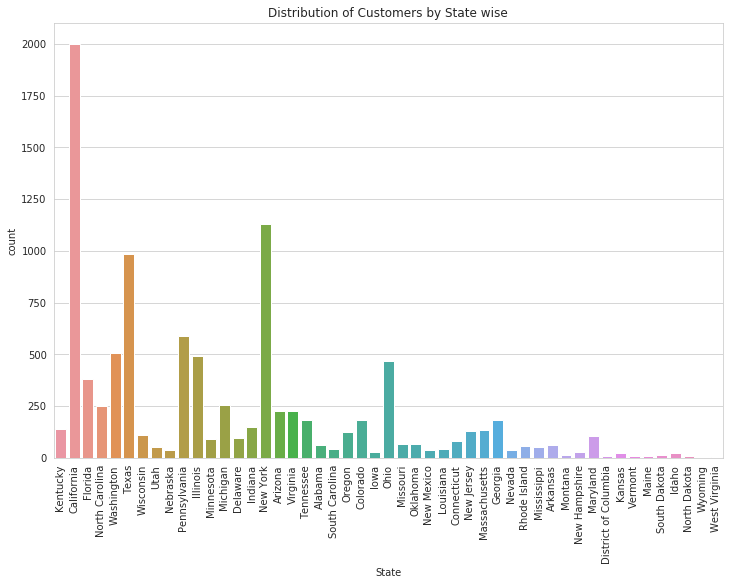

In [12]:
#Let's Visualize the State Column of dataset
fig=plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.countplot(x='State',data=df)
plt.title("Distribution of Customers by State wise")
plt.xticks(rotation=90)
plt.show()

From above graph we can observed that California  Has higest distribution of products followed by New York.

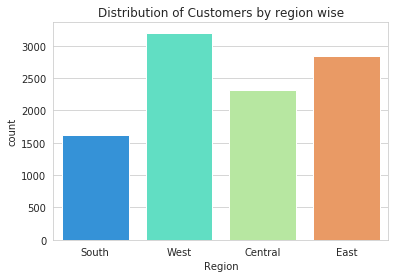

In [13]:
#Let's Visualize the Region Column of dataset
sns.set_style('whitegrid')
sns.countplot(x='Region',data=df,palette='rainbow')
plt.title("Distribution of Customers by region wise")
plt.show()

From above graph we can visualize that west region has higest distribution followed by East,Central and South.

# Region & Sub-Category wise Profit analysis

Text(0, 0.5, 'Profit')

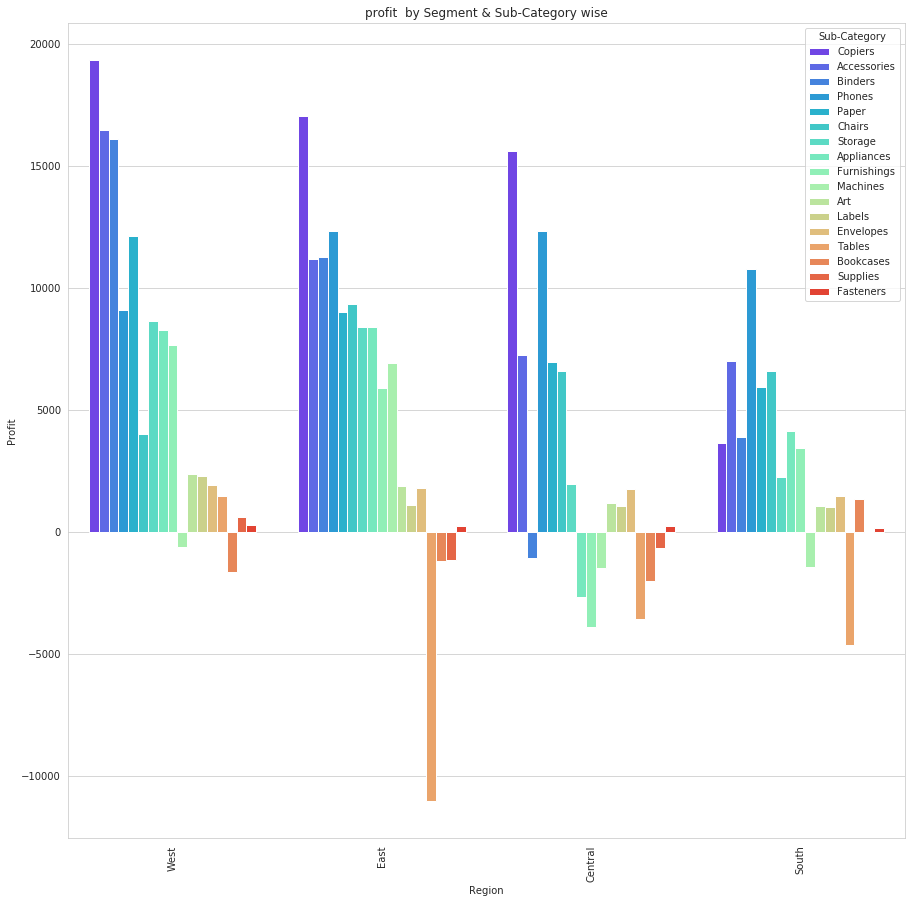

In [14]:
fig=plt.figure(figsize=(15,15))
sale_Products = df.groupby(["Region","Sub-Category"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False)
sns.barplot(x = "Region", y= "Profit" ,hue='Sub-Category',data=sale_Products,palette='rainbow')
plt.title('profit  by Segment & Sub-Category wise')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.ylabel('Profit')

# Regionwise Profit Analysis:-

## From Above graph we can easily interpret that West region gives higest profit among all others.We should increase Sales price of 'Bookcases' in West region.
 
## To increase Profit of East region We have to increase Sales price of 'Tables','Bookcases' and 'Supplies'.
 
## For Central region enhance prices of  'Furnishing', 'Machines', 'Appliances', 'Table', 'Bookcases' and 'Supplies'.

## For South region increment in 'Tables' and 'Machines'.

#  States by sales volume

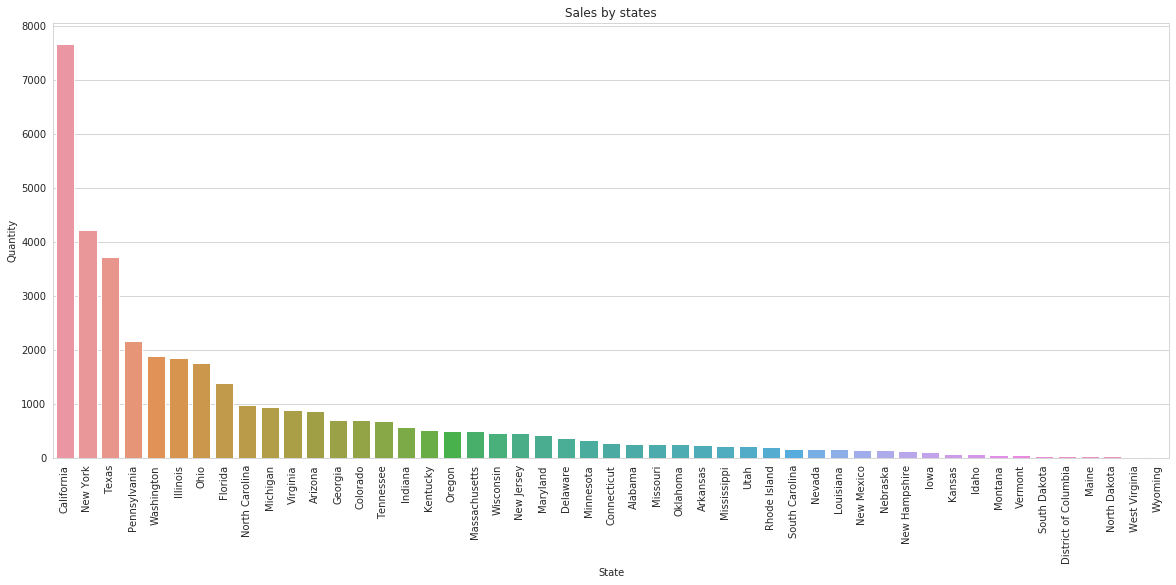

In [15]:
fig = plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sale_cities = df.groupby(["State"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(50)
sns.barplot(x = "State",y= "Quantity",data=sale_cities)
plt.title("Sales by states")
plt.xticks(rotation=90)
plt.show()

## From above graph , Higest sell or distribution is observed in California followed by New York,Texas....!

# Top Selling Sub-Categories 

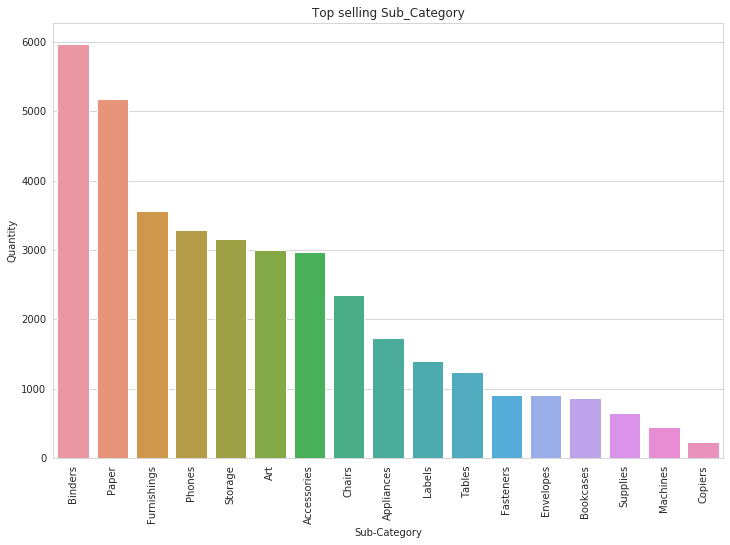

In [16]:
#Top Selling Sub-Category
fig=plt.figure(figsize=(12,8))
sale_SubCategory = df.groupby(["Sub-Category"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(20)
sns.barplot(x = "Sub-Category",y= "Quantity",  data=sale_SubCategory)
plt.title('Top selling Sub_Category')
plt.xticks(Rotation=90)
plt.show()

## From above graph we can said that Binders is having high Demand followed by Paper,Furnishings,Phones... 

Text(0, 0.5, 'Quantity')

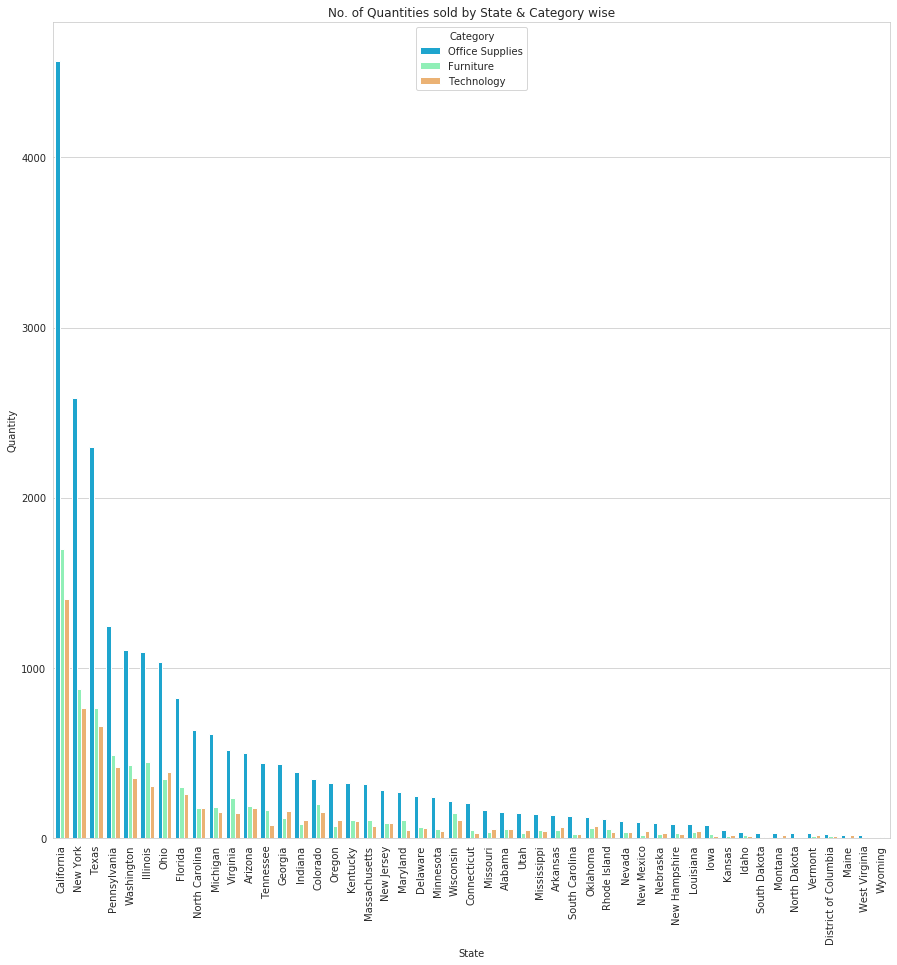

In [17]:
fig=plt.figure(figsize=(15,15))
sale_Products = df.groupby(["State","Category"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False)
sns.barplot(x = "State", y= "Quantity",hue='Category' ,data=sale_Products,palette='rainbow')
plt.title('No. of Quantities sold by State & Category wise')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Quantity')

# Profit by Category wise

Text(0, 0.5, 'Profit')

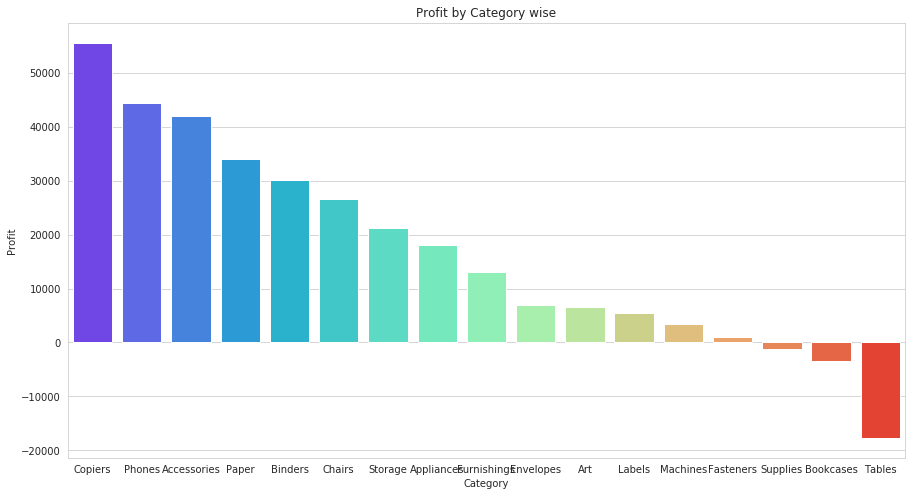

In [18]:
fig=plt.figure(figsize=(15,8))
sale_Products = df.groupby(["Sub-Category"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False)
sns.barplot(x = "Sub-Category", y= "Profit" ,data=sale_Products,palette='rainbow')
plt.title('Profit by Category wise')
plt.xlabel('Category')
plt.ylabel('Profit')

## From Above graph we can observe that maximum loss is given by Tables followed by Bookcases and Supplies


Text(0, 0.5, 'Profit')

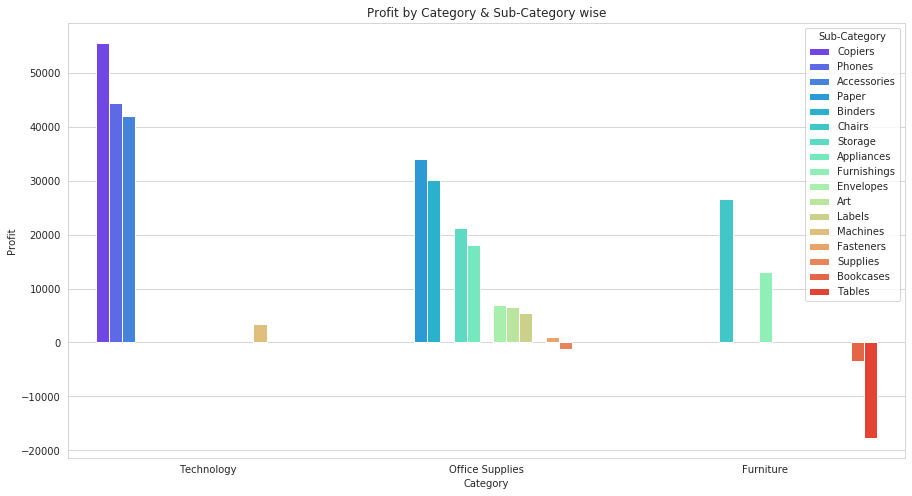

In [19]:
fig=plt.figure(figsize=(15,8))
sale_Products = df.groupby(["Category","Sub-Category"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False)
sns.barplot(x = "Category", y= "Profit",hue='Sub-Category' ,data=sale_Products,palette='rainbow')
plt.title('Profit by Category & Sub-Category wise')
plt.xlabel('Category')
plt.ylabel('Profit')

# From Above graph we can observed various things:-
   1. There are 3 levels in category attribute are Technology,Office Supplies And Furniture.
       1. Firstly ,we can observes that 'Technology' Category gives Maximum Profit followed by 'Office Supplies'             and 'Furniture'.
           
           1. Technology has 4 Sub-Categories:-
              *  'Copiers','Phones','Accessories' and 'Machines'
                      
                      NOTE:- 'Copiers' gives Max profit followed by 'Phones','Accessories','Machines'
                      
           2. Office Supplies has 9 Sub-Categories:-
               * 'Paper','Binders','Storage','Appliances','Envelops','Art','Labels','Fasteners' and 'Supplies'.
                      
                      NOTE:- Paper gives maximum profit followed by 'Binders'....and 'Fasteners'. 'Supplies' gives                              loss. 
           3. Furniture has 4 Sub-Caegories:-
              * 'Chairs','Furnishing','BookCases' and 'Tables'.
                   
                      NOTE:-BookCases and Tables gives loss.
                      
       2.  Maximum Loss given by Frniture category.
       
       3. From above to above graph we can observe that California has maximum profit.We can increase that profit           by stop distribution of Tables and BookCases in Califronia.Because from above graph we can see that               Tables and BookCase gives max loss.
       
       4. To increase profit we to increase sales price of Tables,Bookcases and supplies and  lower down the                     discount  given to each of the above mentioned Sub-Category
       
       

# Discount given in every Sub-Category

Text(0, 0.5, 'Discount')

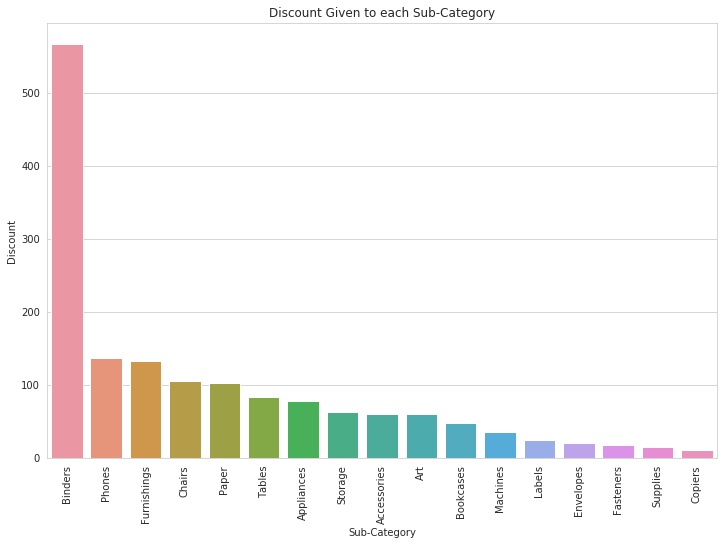

In [20]:
fig=plt.figure(figsize=(12,8))
sale_Products = df.groupby(["Sub-Category"])['Discount'].aggregate(np.sum).reset_index().sort_values('Discount',ascending = False)
sns.barplot(x = "Sub-Category", y= "Discount" ,data=sale_Products)
plt.title('Discount Given to each Sub-Category')
plt.xticks(rotation=90)
plt.xlabel('Sub-Category')
plt.ylabel('Discount')

# Discount Given Statewise

Text(0, 0.5, 'Discount')

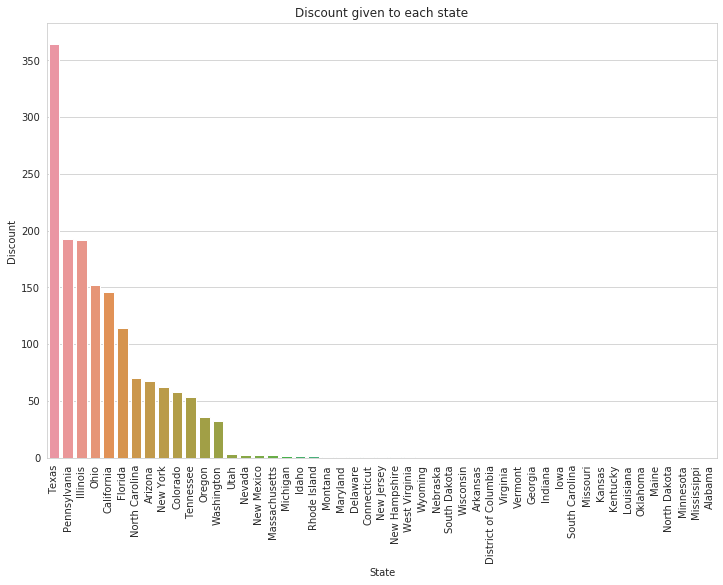

In [21]:
fig=plt.figure(figsize=(12,8))
sale_Products = df.groupby(["State"])['Discount'].aggregate(np.sum).reset_index().sort_values('Discount',ascending = False)
sns.barplot(x = "State", y= "Discount" ,data=sale_Products)
plt.title('Discount given to each state')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Discount')

# Sales By each state 

Text(0, 0.5, 'Sales')

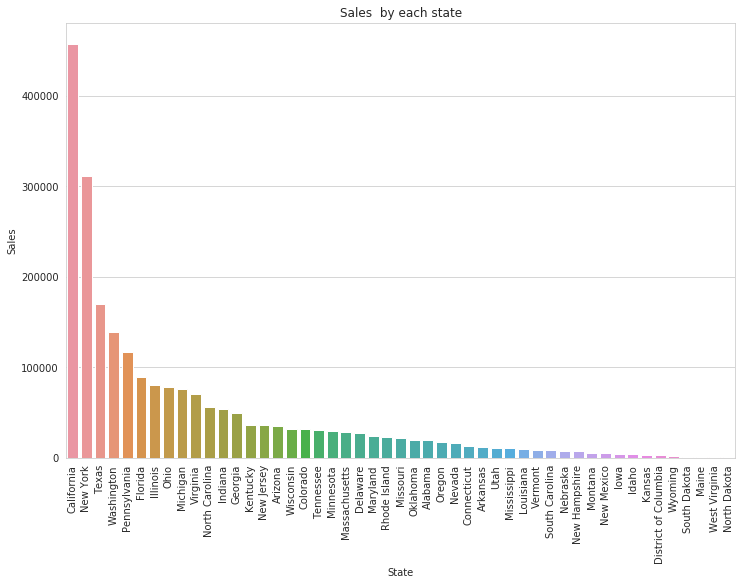

In [22]:
fig=plt.figure(figsize=(12,8))
sale_Products = df.groupby(["State"])['Sales'].aggregate(np.sum).reset_index().sort_values('Sales',ascending = False)
sns.barplot(x = "State", y= "Sales" ,data=sale_Products)
plt.title('Sales  by each state')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Sales')

# State wise profit Analysis

Text(0, 0.5, 'Profit')

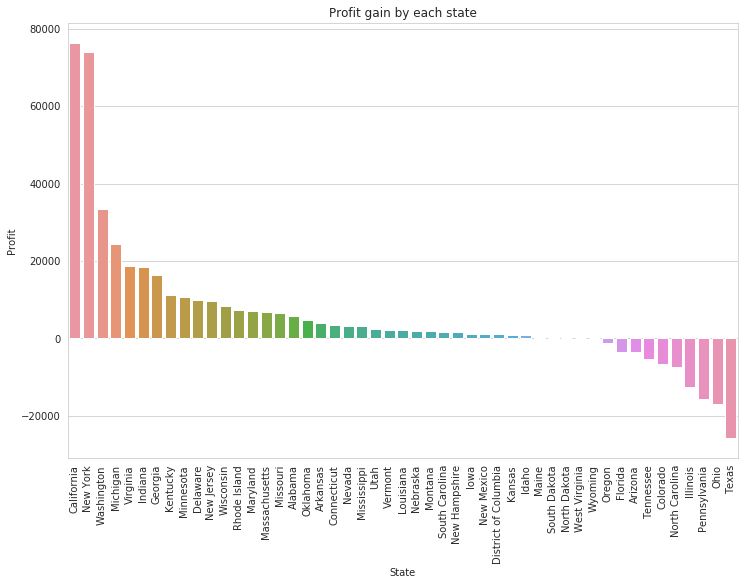

In [23]:
fig=plt.figure(figsize=(12,8))
profit_States = df.groupby(["State"])['Profit'].aggregate(np.sum).reset_index().sort_values('Profit',ascending = False)
profit_States
sns.barplot(x = "State", y= "Profit" ,data=profit_States)
plt.title('Profit gain by each state')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Profit')

## From above graph we can easily interpret the following two things:
1.  Out of 49 states 5 gives no profit and no loss.The States are Maine,South Dakota,North Dakota,West Virginia,Wyoming.
2. The States Oregon ,Florida,Arizona,Tennessee,Colorado,North Carolina,illinois,Pennsylvania,Ohio,Texas gives     Loss.Texas gives maximum Loss of 25729.3563.

# Quantity sold category and sub-category wise

Text(0, 0.5, 'Quantity')

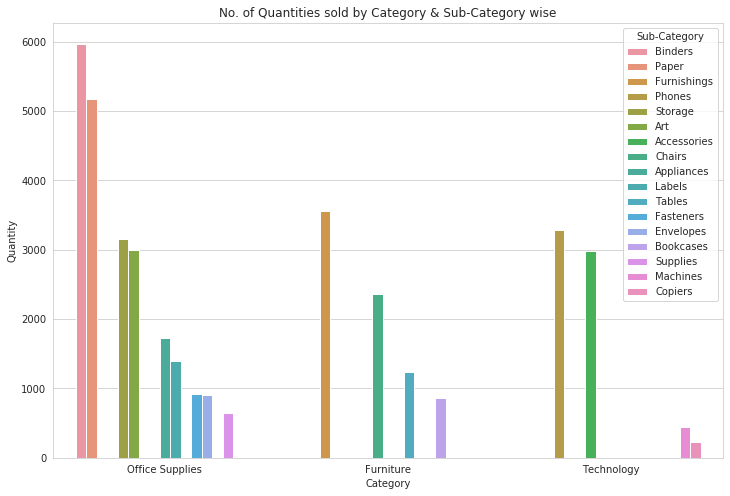

In [24]:
fig=plt.figure(figsize=(12,8))
sale_Products = df.groupby(["Category","Sub-Category"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(20)
sns.barplot(x = "Category", y= "Quantity",hue='Sub-Category' ,data=sale_Products)
plt.title('No. of Quantities sold by Category & Sub-Category wise')
plt.xlabel('Category')
plt.ylabel('Quantity')

From above graph ,we can easily interpret the folowings:

    1. Category  has 3 levels Office Supplies,Furnitur and Technology.The maximum products sold in category Office  Supplies followed by Furniture and Techology

    2. Office Supplies has on highest demand followed by Furniture and Technology.But From Above Analysis We        Observed that maximum loss is given by Furniture category Specially 'Tables' and 'Bookcases'.So we have to        enhance the Sales price of products Table and Bookcases along with it we also have to lower down the              discount given on these two sub-categories. So that we minimize our losses. 

# Sales And Profit Regionwise

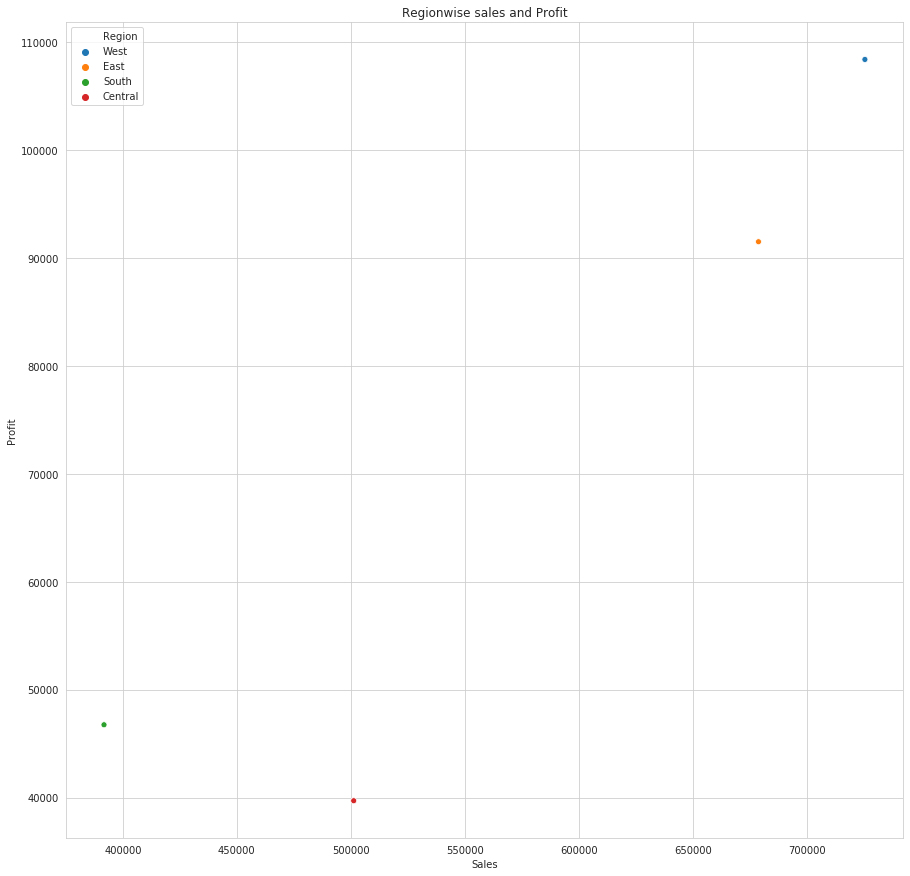

In [25]:
fig = plt.figure(figsize=(15,15))
regionwiseSalesAndProfit = df.groupby("Region").agg({"Sales":np.sum, "Profit": np.sum}).reset_index().sort_values('Profit',ascending = False)
sns.scatterplot(x="Sales", y="Profit", hue='Region', data=regionwiseSalesAndProfit)
regionwiseSalesAndProfit
plt.title('Regionwise sales and Profit')
plt.show()

# Let's Start Geospatial analysis of dataset.
 
## The Folium library in Python helps us analyze the location and geospatial data with ease    and lets us create interactive maps.

## libraries used:-
    1. Geopy (for finding location i.e(latitude and longitude)).
    2. Folium
    
    
    1. Geopy is a Python 2 and 3 client for several popular geocoding web services. Geocoding is the process to identify geographic coordinates like latitude and longitude of a given city/country/address. This is very useful during marking position on the map in data visualization. We use geopy.exec, geocodertimedout, geolocators, geopy.geocoder in the below code to fetch the results.
    
    2.Folium is built on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js (JavaScript) library. Simply, manipulate your data in Python, then visualize it on a leaflet map via Folium. Folium makes it easy to visualize data that’s been manipulated in Python, on an interactive Leaflet map.

In [26]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

In [27]:
# grouping data total sales and profit state wise
StatewiseSalesAndProfit = df.groupby("State").agg({"Sales":np.sum, "Profit": np.sum,"Quantity":np.sum,"Discount":np.sum}).reset_index().sort_values('Profit',ascending = False)
StatewiseSalesAndProfit

,State,Sales,Profit,Quantity,Discount
3,California,457687.6315,76381.3871,7667,145.60
30,New York,310876.2710,74038.5486,4224,62.40
45,Washington,138641.2700,33402.6517,1883,32.40
20,Michigan,76269.6140,24463.1876,946,1.80
44,Virginia,70636.7200,18597.9504,893,0.00
12,Indiana,53555.3600,18382.9363,578,0.00
9,Georgia,49095.8400,16250.0433,705,0.00
15,Kentucky,36591.7500,11199.6966,523,0.00
21,Minnesota,29863.1500,10823.1874,331,0.00
6,Delaware,27451.0690,9977.3748,367,0.60


In [28]:
#Let's find longitude and latitude of of each state in StatewiseSalesAndProfit dataframe
longitude = [] 
latitude = [] 
def findGeocode(State): 
       
     
    try: 
          
         
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(State) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(State)

In [29]:
for i in (StatewiseSalesAndProfit["State"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
       
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan)     

StatewiseSalesAndProfit["Longitude"] = longitude 
StatewiseSalesAndProfit["Latitude"] = latitude  
StatewiseSalesAndProfit

,State,Sales,Profit,Quantity,Discount,Longitude,Latitude
3,California,457687.6315,76381.3871,7667,145.60,-118.755997,36.701463
30,New York,310876.2710,74038.5486,4224,62.40,-74.006015,40.712728
45,Washington,138641.2700,33402.6517,1883,32.40,-77.036571,38.894985
20,Michigan,76269.6140,24463.1876,946,1.80,-84.682435,43.621195
44,Virginia,70636.7200,18597.9504,893,0.00,-78.492772,37.123224
12,Indiana,53555.3600,18382.9363,578,0.00,-86.174693,40.327013
9,Georgia,49095.8400,16250.0433,705,0.00,-83.113737,32.329381
15,Kentucky,36591.7500,11199.6966,523,0.00,-85.155141,37.572603
21,Minnesota,29863.1500,10823.1874,331,0.00,-94.611329,45.989659
6,Delaware,27451.0690,9977.3748,367,0.60,-75.401331,38.692045


In [30]:
# let's import folium  and creates base map
import folium 
import webbrowser
# latitude and longitude of United States.
latitude = 37.0902
longitude = -95.7129
US_map = folium.Map(location=[latitude, longitude], zoom_start=5)
colordict = {0: 'lightgreen', 1: 'red'}

In [31]:
# Main purpose of this function is to color circlemarkers green and red as the gives profit and loss respectively.
def color(profit): 
    if profit>0: 
        col = 'green'
    else: 
        col='red'
    return col

In [32]:
for lat, lon, state, sales,qty,discount, profit in zip(StatewiseSalesAndProfit['Latitude'], StatewiseSalesAndProfit['Longitude'], StatewiseSalesAndProfit['State'], StatewiseSalesAndProfit['Sales'],StatewiseSalesAndProfit['Quantity'],StatewiseSalesAndProfit['Discount'], StatewiseSalesAndProfit['Profit']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        popup = ('State: ' + str(state).capitalize() + '<br>'
                 'Sales: ' + str(sales) + '<br>'+'Quantity: ' + str(qty)+ '<br>'+'Discount: ' + str(discount)+ '<br>'
                 'Profit: ' + str(profit) ),
        color='b',
        fill_color=color(profit),
        fill=True,
        fill_opacity=0.7
        ).add_to(US_map)
    
US_map

1. From above map we can easily find out by looking on the map that which state gives loss and which state gives profit to the company.

2. These red and green circlemarkers gives information about total sales and profit in particular state simply by clicking on it. 

# Citywise Sales,quantity,discount and profit analysis.

In [36]:
CitywiseSalesAndProfit = df.groupby("City").agg({"Sales":np.sum, "Profit": np.sum,"Quantity":np.sum,"Discount":np.sum}).reset_index().head(200)
CitywiseSalesAndProfit

,City,Sales,Profit,Quantity,Discount
0,Aberdeen,25.5000,6.6300,3,0.00
1,Abilene,1.3920,-3.7584,2,0.80
2,Akron,2729.9860,-186.6356,65,7.50
3,Albuquerque,2220.1600,634.0881,65,0.80
4,Alexandria,5519.5700,318.6183,84,0.00
...,...,...,...,...,...
195,Hendersonville,319.5380,-45.3867,22,2.00
196,Hesperia,1213.1715,98.5269,18,0.55
197,Hialeah,2338.9490,-179.2275,76,5.20
198,Hickory,40.7640,-1.0956,5,0.90


In [37]:
longitude = [] 
latitude = [] 
def findGeocode(City): 
       
     
    try: 
          
         
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(City) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(City)

In [38]:
for i in (CitywiseSalesAndProfit["City"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
       
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan)     

CitywiseSalesAndProfit["Longitude"] = longitude 
CitywiseSalesAndProfit["Latitude"] = latitude  
CitywiseSalesAndProfit

,City,Sales,Profit,Quantity,Discount,Longitude,Latitude
0,Aberdeen,25.5000,6.6300,3,0.00,-2.092809,57.148243
1,Abilene,1.3920,-3.7584,2,0.80,-99.747591,32.446450
2,Akron,2729.9860,-186.6356,65,7.50,-81.518485,41.083064
3,Albuquerque,2220.1600,634.0881,65,0.80,-106.650985,35.084103
4,Alexandria,5519.5700,318.6183,84,0.00,29.894378,31.199004
...,...,...,...,...,...,...,...
195,Hendersonville,319.5380,-45.3867,22,2.00,-82.460953,35.318728
196,Hesperia,1213.1715,98.5269,18,0.55,-117.300878,34.426389
197,Hialeah,2338.9490,-179.2275,76,5.20,-80.278106,25.857596
198,Hickory,40.7640,-1.0956,5,0.90,-93.333475,37.959055


In [39]:
import folium 
import webbrowser
# latitude and longitude of United States.
latitude = 37.0902
longitude = -95.7129
US_map = folium.Map(location=[latitude, longitude], zoom_start=5)
colordict = {0: 'lightgreen', 1: 'red'}

In [40]:
# Main purpose of this function is to color circlemarkers green and red as the gives profit and loss respectively.
def color(profit): 
    if profit>0: 
        col = 'green'
    else: 
        col='red'
    return col

In [41]:
for lat, lon, city, sales,qty,discount, profit in zip(CitywiseSalesAndProfit['Latitude'], CitywiseSalesAndProfit['Longitude'], CitywiseSalesAndProfit['City'], CitywiseSalesAndProfit['Sales'],CitywiseSalesAndProfit['Quantity'],CitywiseSalesAndProfit['Discount'], CitywiseSalesAndProfit['Profit']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        popup = ('City: ' + str(city).capitalize() + '<br>'
                 'Sales: ' + str(sales) + '<br>'+'Quantity: ' + str(qty)+ '<br>'+'Discount: ' + str(discount)+ '<br>'
                 'Profit: ' + str(profit) ),
        color='b',
        fill_color=color(profit),
        fill=True,
        fill_opacity=0.7
        ).add_to(US_map)
    
US_map

In [ ]:
From above map ,red circles represents those cities which are giving loss to company and green circles represents those cities which are giving profit to the company.
  1.  So we have to focused on red marks in map for enhancement of profit.

# Final Conclusions:-
   ## Ship Mode:-
      1. In ship mode 'Same Day' level has lowest distributions.So we have to Focus on our Same Day Shipment Mode. 
   ## Segment:-
      1.  We have enhanced our profit by increasing Sales Price of 'Table','BookCases' and 'Supplies' in Consumer           Segment And increasing price of Table in other two Segments i.e Corporate and Home Office.Because these           gives loss to the Company. 
   ## State:-
      1. California has highest no. of Customers followed by New York ,Texas.....
      
      2. So we have to focus on the States having least no. of Customers like West Virgina,Wyoming, North Dakota            So we have to focus on these states to increase number of Customers or distribution of our products.
      
      3. we have to focus on states giving loss to the company Texas,Orego ,Florida,Arizona,Tennessee,Colorado,            North Carolina,illinois,Pennsylvania,Ohio,Texas.
      
      4. Out of 49 states 5 gives no profit and no loss.The States are Maine,South Dakota,North Dakota,West                Virginia,Wyoming.
   ## Region:-  
      1. From Above graph we can easily interpret that West region gives higest profit among all others.Altough We
        can increase our profit by increasing  Sales price of 'Bookcases' in West region because it gives loss to 
        this region.
 
      2. To increase Profit of East region We have to increase Sales price of 'Tables','Bookcases' and 'Supplies'.
 
      3. For Central region enhance prices of,'Accessories','Furnishing', 'Machines', 'Appliances', 'Table', 'Bookcases' and            'Supplies'.

      4.  For South region increment in sales price of 'Tables' and 'Machines'.
   ## Category:-
      1. Technology Category gives maximum profit but its distributions or demands are less so we have to focused
         on incrementing suppiles of products of this category e.g('Phones','Accessories','Appliances'etc.)
   ## Sub- Category:-   
       1. Coppiers give max profit followed by Phones,Acessories,Paper.But we know highest selling products are             Binders,Papers,Furnishings...So we have to focused on Coppiers ,Phones to increase their distribution in          different States and cities.
     